In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("Advertising.csv")
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [7]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [9]:
print(df.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [25]:
df.shape

(200, 5)

In [41]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

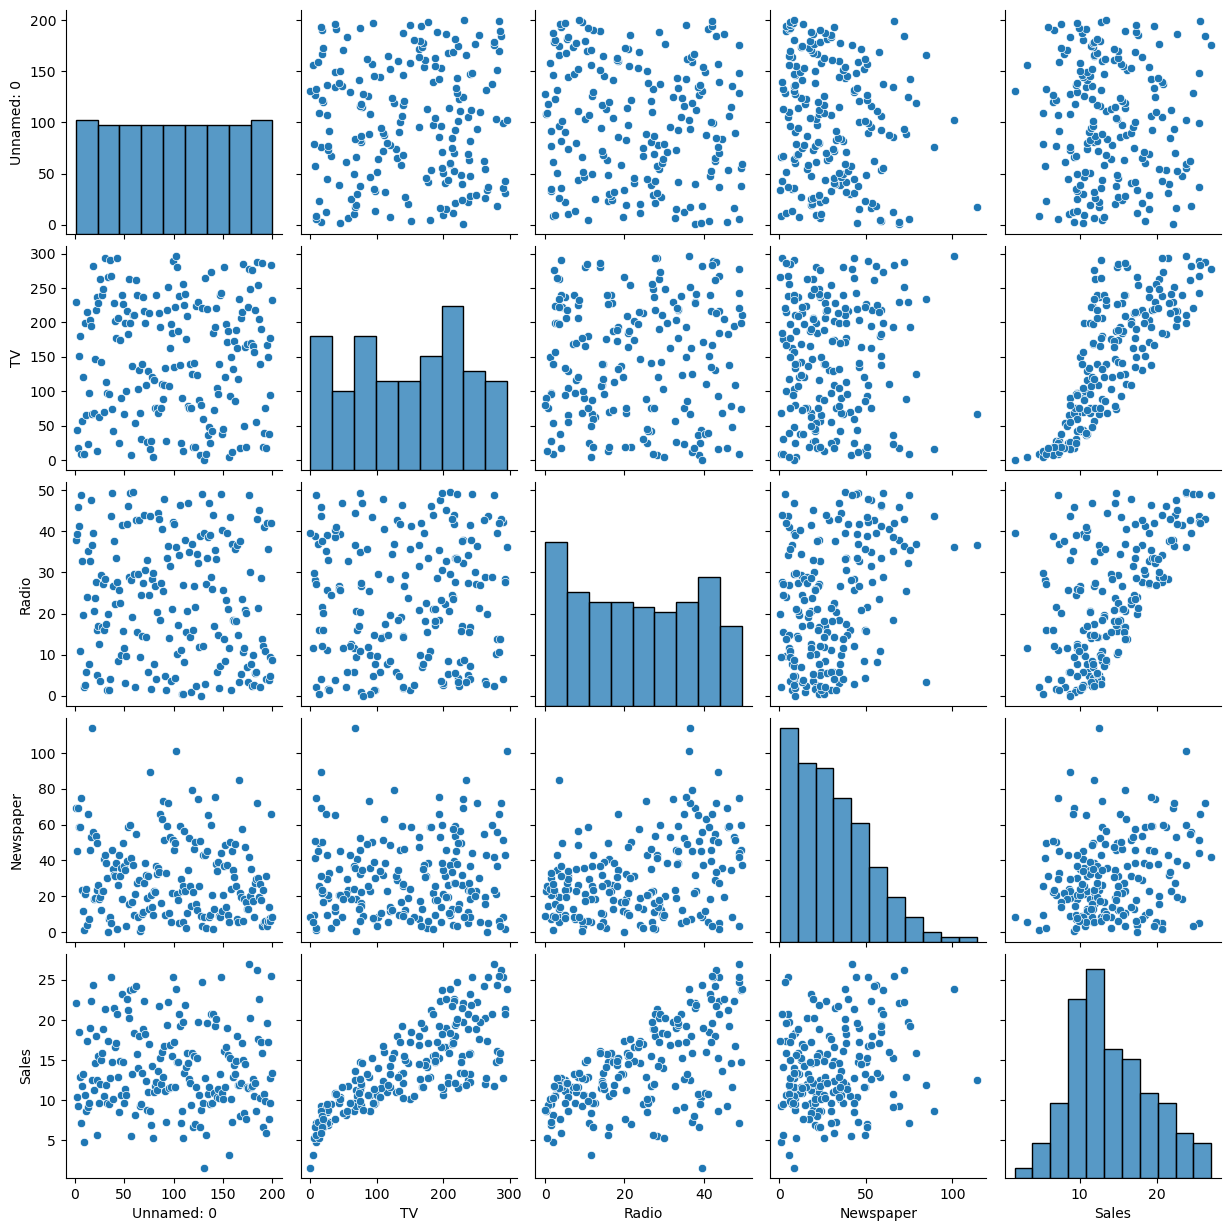

In [35]:
# Pairplot to check relationships
sns.pairplot(df)
plt.show()

In [29]:
df.corr(numeric_only = True)

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


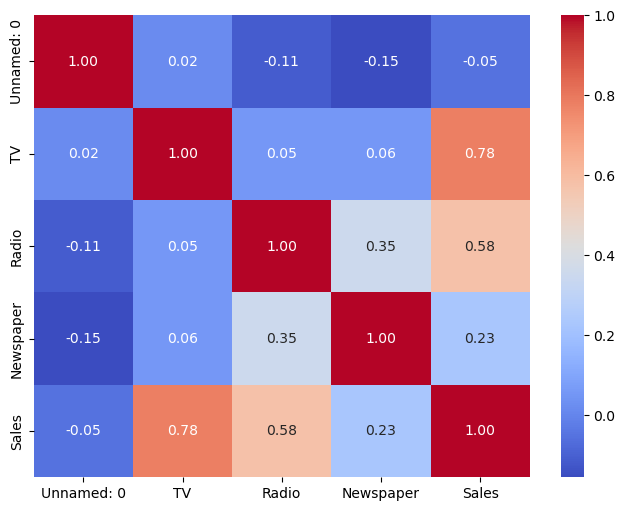

In [13]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

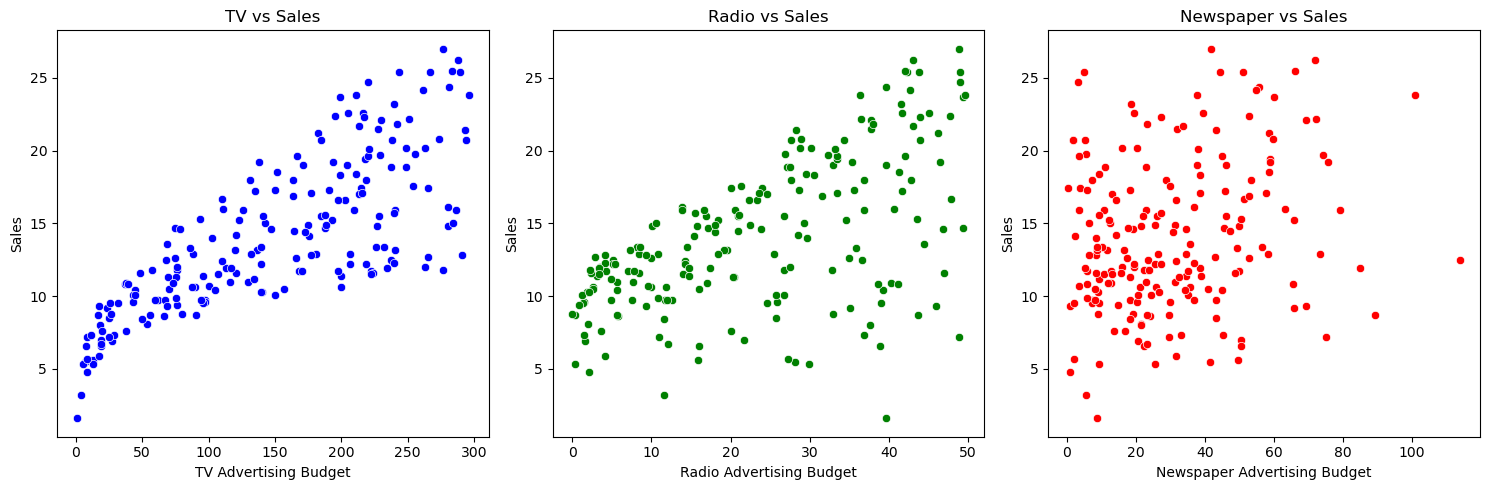

In [51]:
# Set figure size
plt.figure(figsize=(15, 5))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x=df["TV"], y=df["Sales"], color="blue")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV vs Sales")

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x=df["Radio"], y=df["Sales"], color="green")
plt.xlabel("Radio Advertising Budget")
plt.ylabel("Sales")
plt.title("Radio vs Sales")

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x=df["Newspaper"], y=df["Sales"], color="red")
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")

# Show plots
plt.tight_layout()
plt.show()

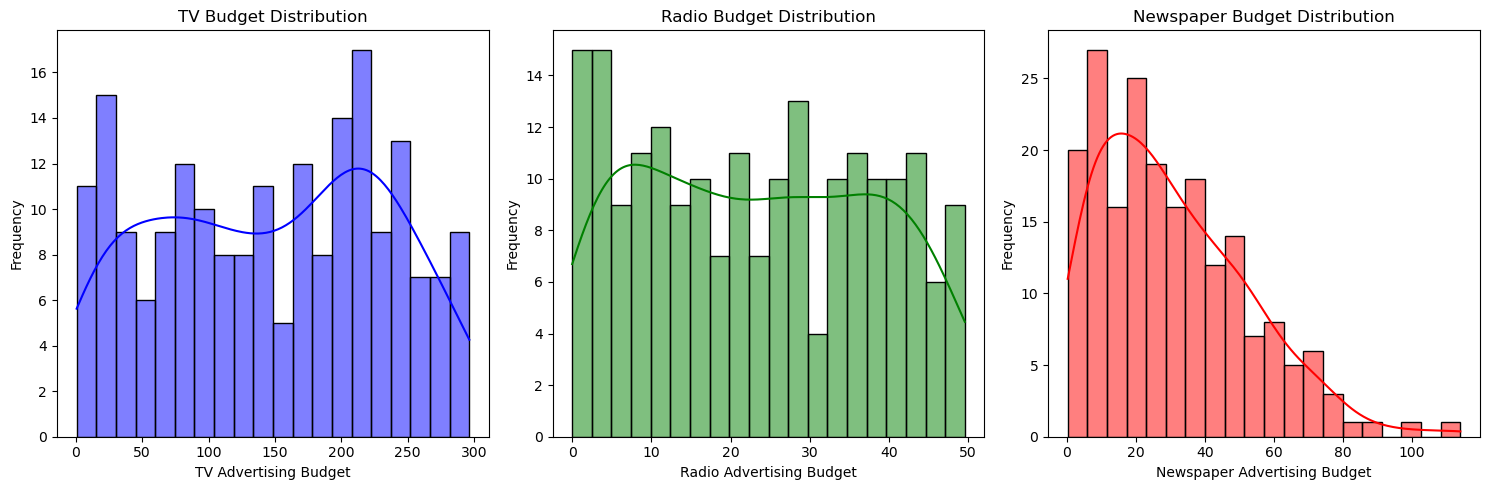

In [57]:
# Set figure size
plt.figure(figsize=(15, 5))

# TV Budget Distribution
plt.subplot(1, 3, 1)
sns.histplot(df["TV"], bins=20, kde=True, color="blue")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Frequency")
plt.title("TV Budget Distribution")

# Radio Budget Distribution
plt.subplot(1, 3, 2)
sns.histplot(df["Radio"], bins=20, kde=True, color="green")
plt.xlabel("Radio Advertising Budget")
plt.ylabel("Frequency")
plt.title("Radio Budget Distribution")

# Newspaper Budget Distribution
plt.subplot(1, 3, 3)
sns.histplot(df["Newspaper"], bins=20, kde=True, color="red")
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Frequency")
plt.title("Newspaper Budget Distribution")

plt.tight_layout()
plt.show()


In [15]:
# Define features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 2.979067338122631
Coefficients: [0.04472952 0.18919505 0.00276111]


In [19]:
# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 1.4607567168117597
Mean Squared Error: 3.1740973539761015
Root Mean Squared Error: 1.7815996615334495
R² Score: 0.8994380241009121


In [21]:
new_data = pd.DataFrame({'TV': [150], 'Radio': [30], 'Newspaper': [20]})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]}")


Predicted Sales: 15.419568872288716


In [63]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


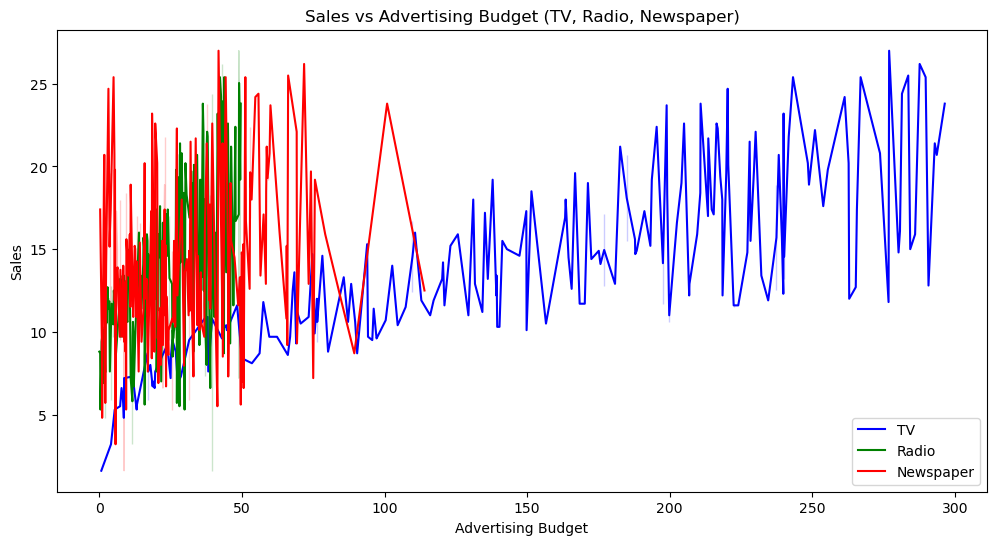

In [67]:

plt.figure(figsize=(12, 6))

# Line plot for TV vs Sales
sns.lineplot(x=df["TV"], y=df["Sales"], color="blue", label="TV")

# Line plot for Radio vs Sales
sns.lineplot(x=df["Radio"], y=df["Sales"], color="green", label="Radio")

# Line plot for Newspaper vs Sales
sns.lineplot(x=df["Newspaper"], y=df["Sales"], color="red", label="Newspaper")

plt.xlabel("Advertising Budget")
plt.ylabel("Sales")
plt.title("Sales vs Advertising Budget (TV, Radio, Newspaper)")
plt.legend()
plt.show()


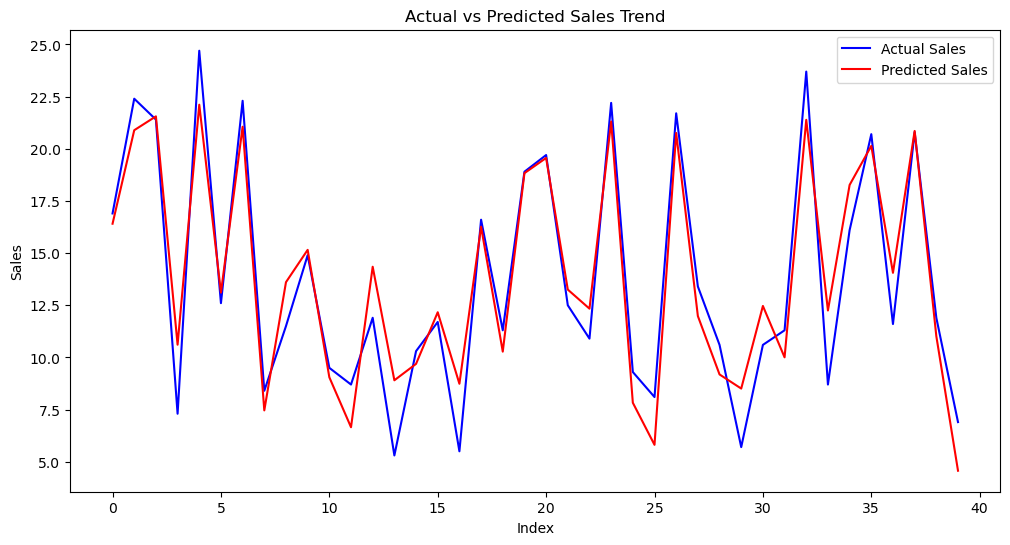

In [71]:
#  Define `results_df` before plotting
results_df = pd.DataFrame({"Actual Sales": y_test.values, "Predicted Sales": y_pred})

#  Reset index for proper plotting
results_df.reset_index(drop=True, inplace=True)

# 🔹 Plot Actual vs Predicted Sales Trend
plt.figure(figsize=(12, 6))

# Actual Sales Line
sns.lineplot(x=results_df.index, y=results_df["Actual Sales"], label="Actual Sales", color="blue")

# Predicted Sales Line
sns.lineplot(x=results_df.index, y=results_df["Predicted Sales"], label="Predicted Sales", color="red")

plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales Trend")
plt.legend()
plt.show()
